### Stack Overflow Developer Survey 2021 EDA
Data Overview: "With nearly 80,000 responses fielded from over 180 countries and dependent territories, our Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software."

EDA Tasks:
- Determine size of dataset
- Check for column names that need to be rewritten
- Determine types of variables
- Check for duplicate indexes
- Preliminary analysis on factors influencing salary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import textwrap as tw
import matplotlib.ticker as mtick
import dataframe_image as dfi

%matplotlib inline

In [2]:
print(locale.setlocale(locale.LC_ALL, ''))

en_US.UTF-8


In [3]:
developers = pd.read_csv('survey_results_public.csv')

Number of records:

In [4]:
print(len(developers))

83439


In [5]:
pd.set_option('display.max_columns', None)
developers.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

Check for duplicates in ResponseId. If no duplicates, reassign index as ResponseId:

In [6]:
developers['ResponseId'].value_counts()

1        1
55614    1
55632    1
55631    1
55630    1
        ..
27812    1
27811    1
27810    1
27809    1
83439    1
Name: ResponseId, Length: 83439, dtype: int64

In [7]:
developers = developers.set_index('ResponseId')
developers.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassan

In [8]:
developers.columns

Index(['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

Columns are all properly formatted, no blank spaces or unusual characters. These can be left as is.

In [9]:
developers.dtypes

MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object
MiscTechWantToWorkWith           object


Note that compensation (CompTotal and ConvertedCompYearly) are the only float values, all other columns are objects.
Expected YearsCode and YearsCodePro to be floats or ints, these will need to be converted. A few columns have age ranges that should be converted likely to categorical variables.

Check for non-null counts:

In [10]:
developers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83439 entries, 1 to 83439
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    83439 non-null  object 
 1   Employment                    83323 non-null  object 
 2   Country                       83439 non-null  object 
 3   US_State                      14920 non-null  object 
 4   UK_Country                    4418 non-null   object 
 5   EdLevel                       83126 non-null  object 
 6   Age1stCode                    83243 non-null  object 
 7   LearnCode                     82963 non-null  object 
 8   YearsCode                     81641 non-null  object 
 9   YearsCodePro                  61216 non-null  object 
 10  DevType                       66484 non-null  object 
 11  OrgSize                       60726 non-null  object 
 12  Currency                      61080 non-null  object 
 13  C

Columns with high null counts: US_State, UK_Country, CompTotal (about 50%, this will cut our dataset in half), PlatformWantToWorkWith, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, ConvertedCompYearly

Value counts for each column:

In [11]:
for col in developers:
    print(f"Column name: {col}")
    print(developers[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: MainBranch
I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64
--------------------------------------------------


Column name: Employment
Employed full-time                                      53584
Student, full-time                                      11781
Independent contractor, freelancer, or self-employed     8041
Not employed, but looking for work                       2961
Employed part-time                                       2461
Student, part-time                  

This shows us why YearsCode and YearsCodePro are not floats/ints: they have text options for less than 1 year and more than 50 years, do we want to eliminate these? 

## US Only

In [12]:
print(len(developers))
developers = developers[developers['Country'] == 'United States of America']
print(len(developers))

83439
15288


## Demographics Analysis

1. Create sub-series with just demographics and ConvertedCompYearly

In [13]:
developers_demo = developers[['Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth', 'ConvertedCompYearly']]
developers_demo.head()

,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ConvertedCompYearly
ResponseId,,,,,,,,
6,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,NaN
7,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,NaN
16,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,NaN
37,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,103000.0
38,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,300000.0


2. Remove salaries above 1 million and below 20,000 

Assumption: these are unlikely to be accurate

In [14]:
print(developers_demo['ConvertedCompYearly'].describe())
print(len(developers_demo['ConvertedCompYearly']))
developers_demo = developers_demo[(developers_demo['ConvertedCompYearly'] > 20000) & (developers_demo['ConvertedCompYearly'] <1000000)]
print(developers_demo['ConvertedCompYearly'].describe())
print(len(developers_demo['ConvertedCompYearly']))

count    9.870000e+03
mean     2.629939e+05
std      8.507754e+05
min      1.000000e+00
25%      9.000000e+04
50%      1.250000e+05
75%      1.710000e+05
max      2.182225e+07
Name: ConvertedCompYearly, dtype: float64
15288
count      9414.000000
mean     143053.751646
std       94452.919627
min       20400.000000
25%       90000.000000
50%      125000.000000
75%      165000.000000
max      990000.000000
Name: ConvertedCompYearly, dtype: float64
9414


## Gender

In [15]:
print(developers_demo['Gender'].value_counts(dropna=False))
print(len(developers_demo['Gender']))

Man                                                                                   8400
Woman                                                                                  563
Prefer not to say                                                                      121
Non-binary, genderqueer, or gender non-conforming                                      115
NaN                                                                                     56
Man;Non-binary, genderqueer, or gender non-conforming                                   51
Woman;Non-binary, genderqueer, or gender non-conforming                                 37
Or, in your own words:                                                                  35
Man;Or, in your own words:                                                              22
Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:           5
Man;Woman                                                                                3

Assumption: Any response that combines man, woman, and/or non-binary can be categorized into "Non-binary, genderqueer, or gender non-conforming"

In [16]:
gender_list = ['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
for row in developers_demo.Gender:
    if row not in gender_list and pd.isna(row) == False:
        developers_demo.Gender = developers_demo.Gender.replace(row, 'Non-binary, genderqueer, or gender non-conforming')
developers_demo.Gender.value_counts(dropna=False)

Man                                                  8400
Woman                                                 563
Non-binary, genderqueer, or gender non-conforming     395
NaN                                                    56
Name: Gender, dtype: int64

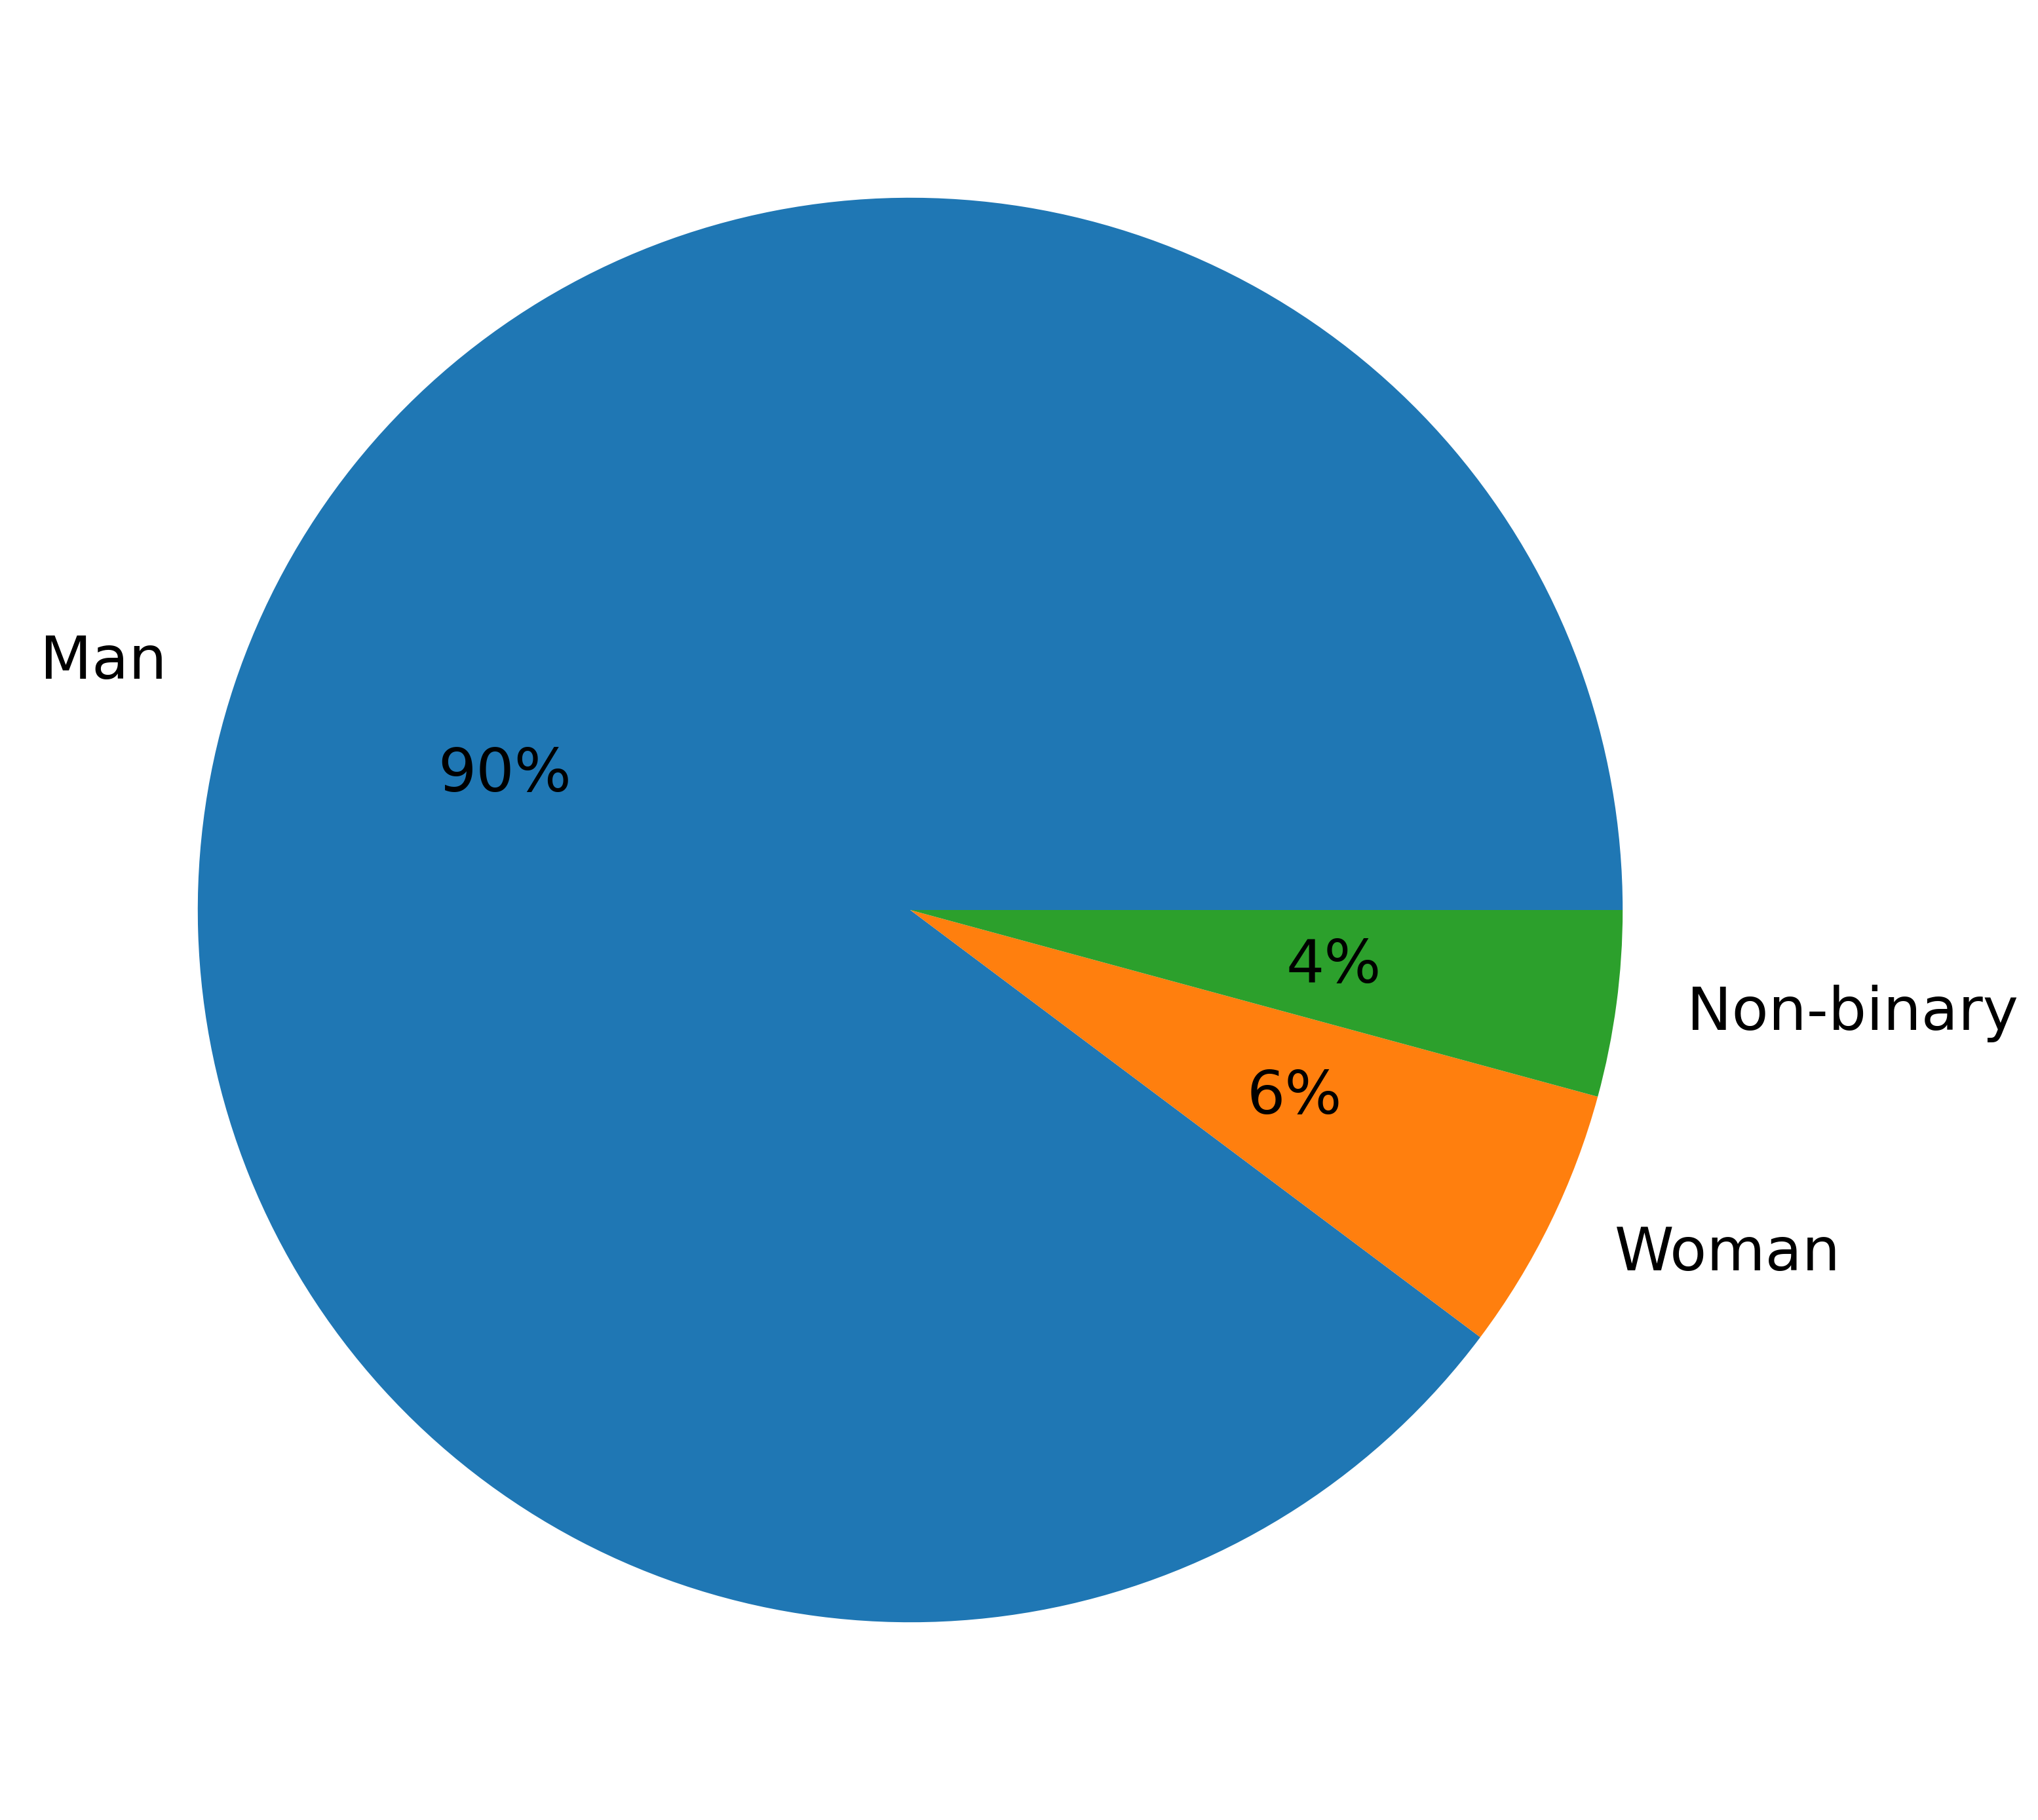

In [17]:
plt.figure(figsize=(12, 12), dpi=300)
plt.pie([8400/9358, 563/9358, 395/9358], labels=['Man', 'Woman', 'Non-binary'], autopct = '%0.0f%%', textprops={'fontsize': 22})
plt.savefig('gender_pie.png')

Text(0.5, 1.0, 'StackOverflow Survey Data: Effect of Gender on Salary')

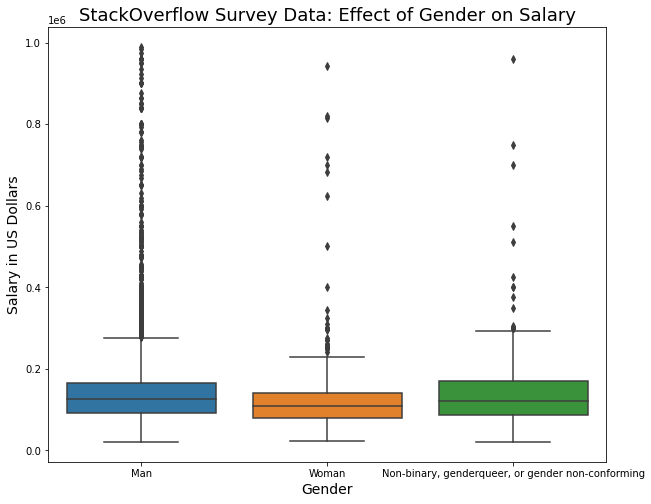

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Gender', y='ConvertedCompYearly', data=developers_demo, 
           order=['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming'])
plt.ylabel('Salary in US Dollars', size=14)
plt.xlabel('Gender', size=14)
plt.title("StackOverflow Survey Data: Effect of Gender on Salary", size=18)

In [19]:
man_mean = developers_demo[developers_demo['Gender'] == 'Man'].ConvertedCompYearly.mean()
man_mode = developers_demo[developers_demo['Gender'] == 'Man'].ConvertedCompYearly.mode()
print(f'Mean Salary for Man: {locale.currency(man_mean, grouping=True)}')
print(f'Mode Salary for Man: {locale.currency(man_mode[0], grouping=True)}')

Mean Salary for Man: $144,404.07
Mode Salary for Man: $150,000.00


In [20]:
woman_mean = developers_demo[developers_demo['Gender'] == 'Woman'].ConvertedCompYearly.mean()
woman_mode = developers_demo[developers_demo['Gender'] == 'Woman'].ConvertedCompYearly.mode()
print(f'Mean Salary for Woman: {locale.currency(woman_mean, grouping=True)}')
print(f'Mode Salary for Woman: {locale.currency(woman_mode[0], grouping=True)}')
print(f"On average, women make about {woman_mean/man_mean*100:.0f} cents to a man's dollar.")
print(f"Looking at the most frequently occuring salaries, women make about {woman_mode[0]/man_mode[0]*100:.0f} cents to a man's dollar.")

Mean Salary for Woman: $123,716.02
Mode Salary for Woman: $100,000.00
On average, women make about 86 cents to a man's dollar.
Looking at the most frequently occuring salaries, women make about 67 cents to a man's dollar.


In [21]:
nb_mean = developers_demo[developers_demo['Gender'] == 'Non-binary, genderqueer, or gender non-conforming'].ConvertedCompYearly.mean()
nb_mode = developers_demo[developers_demo['Gender'] == 'Non-binary, genderqueer, or gender non-conforming'].ConvertedCompYearly.mode()
print(f'Mean Salary for Non-binary People: {locale.currency(nb_mean, grouping=True)}')
print(f'Mode Salary for Non-binary People: {locale.currency(nb_mode[0], grouping=True)}')
print(f"On average, non-binary people make about {nb_mean/man_mean*100:.0f} cents to a man's dollar.")
print(f"Looking at the most frequently occuring salaries, non-binary people make about {nb_mode[0]/man_mode[0]*100:.0f} cents to a man's dollar.")

Mean Salary for Non-binary People: $140,469.90
Mode Salary for Non-binary People: $120,000.00
On average, non-binary people make about 97 cents to a man's dollar.
Looking at the most frequently occuring salaries, non-binary people make about 80 cents to a man's dollar.


In [22]:
mean = pd.Series({'Man': locale.currency(man_mean, grouping=True), 'Woman': locale.currency(woman_mean, grouping=True), 'Non-binary': locale.currency(nb_mean, grouping=True)}, index = ['Man', 'Woman', 'Non-binary'], name = 'Mean Salary')
mode = pd.Series({'Man': locale.currency(man_mode[0], grouping=True), 'Woman': locale.currency(woman_mode[0], grouping=True), 'Non-binary': locale.currency(nb_mode[0], grouping=True)}, index = ['Man', 'Woman', 'Non-binary'], name = 'Mode Salary')
meantodollar = pd.Series({'Man': locale.currency(1, grouping=True), 'Woman': locale.currency(woman_mean/man_mean, grouping=True), 'Non-binary': locale.currency(nb_mean/man_mean, grouping=True)}, index = ['Man', 'Woman', 'Non-binary'], name = 'Mean Cents to Male Dollar')
modetodollar = todollar = pd.Series({'Man': locale.currency(1, grouping=True), 'Woman': locale.currency(woman_mode[0]/man_mode[0], grouping=True), 'Non-binary': locale.currency(nb_mode[0]/man_mode[0], grouping=True)}, index = ['Man', 'Woman', 'Non-binary'], name = 'Mode Cents to Male Dollar')

In [23]:
gender_table = pd.DataFrame([mean, mode, meantodollar, modetodollar])
gender_table

,Man,Woman,Non-binary
Mean Salary,"$144,404.07","$123,716.02","$140,469.90"
Mode Salary,"$150,000.00","$100,000.00","$120,000.00"
Mean Cents to Male Dollar,$1.00,$0.86,$0.97
Mode Cents to Male Dollar,$1.00,$0.67,$0.80


In [24]:
dfi.export(gender_table, 'gender_table.png')

objc[8508]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa5710e318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.88/Libraries/libGLESv2.dylib (0x10e9cef48). One of the two will be used. Which one is undefined.
[0412/100714.356368:INFO:headless_shell.cc(659)] Written to file /var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/tmp8nes2x5i/temp.png.


In [25]:
def wrap_xlabels(axis, width, fontsize, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(tw.fill(text, width=width, break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0, fontsize=fontsize)

In [26]:
def wrap_ylabels(axis, width, fontsize, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(tw.fill(text, width=width, break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0, fontsize=fontsize)

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_8500/3896662847.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=fontsize)


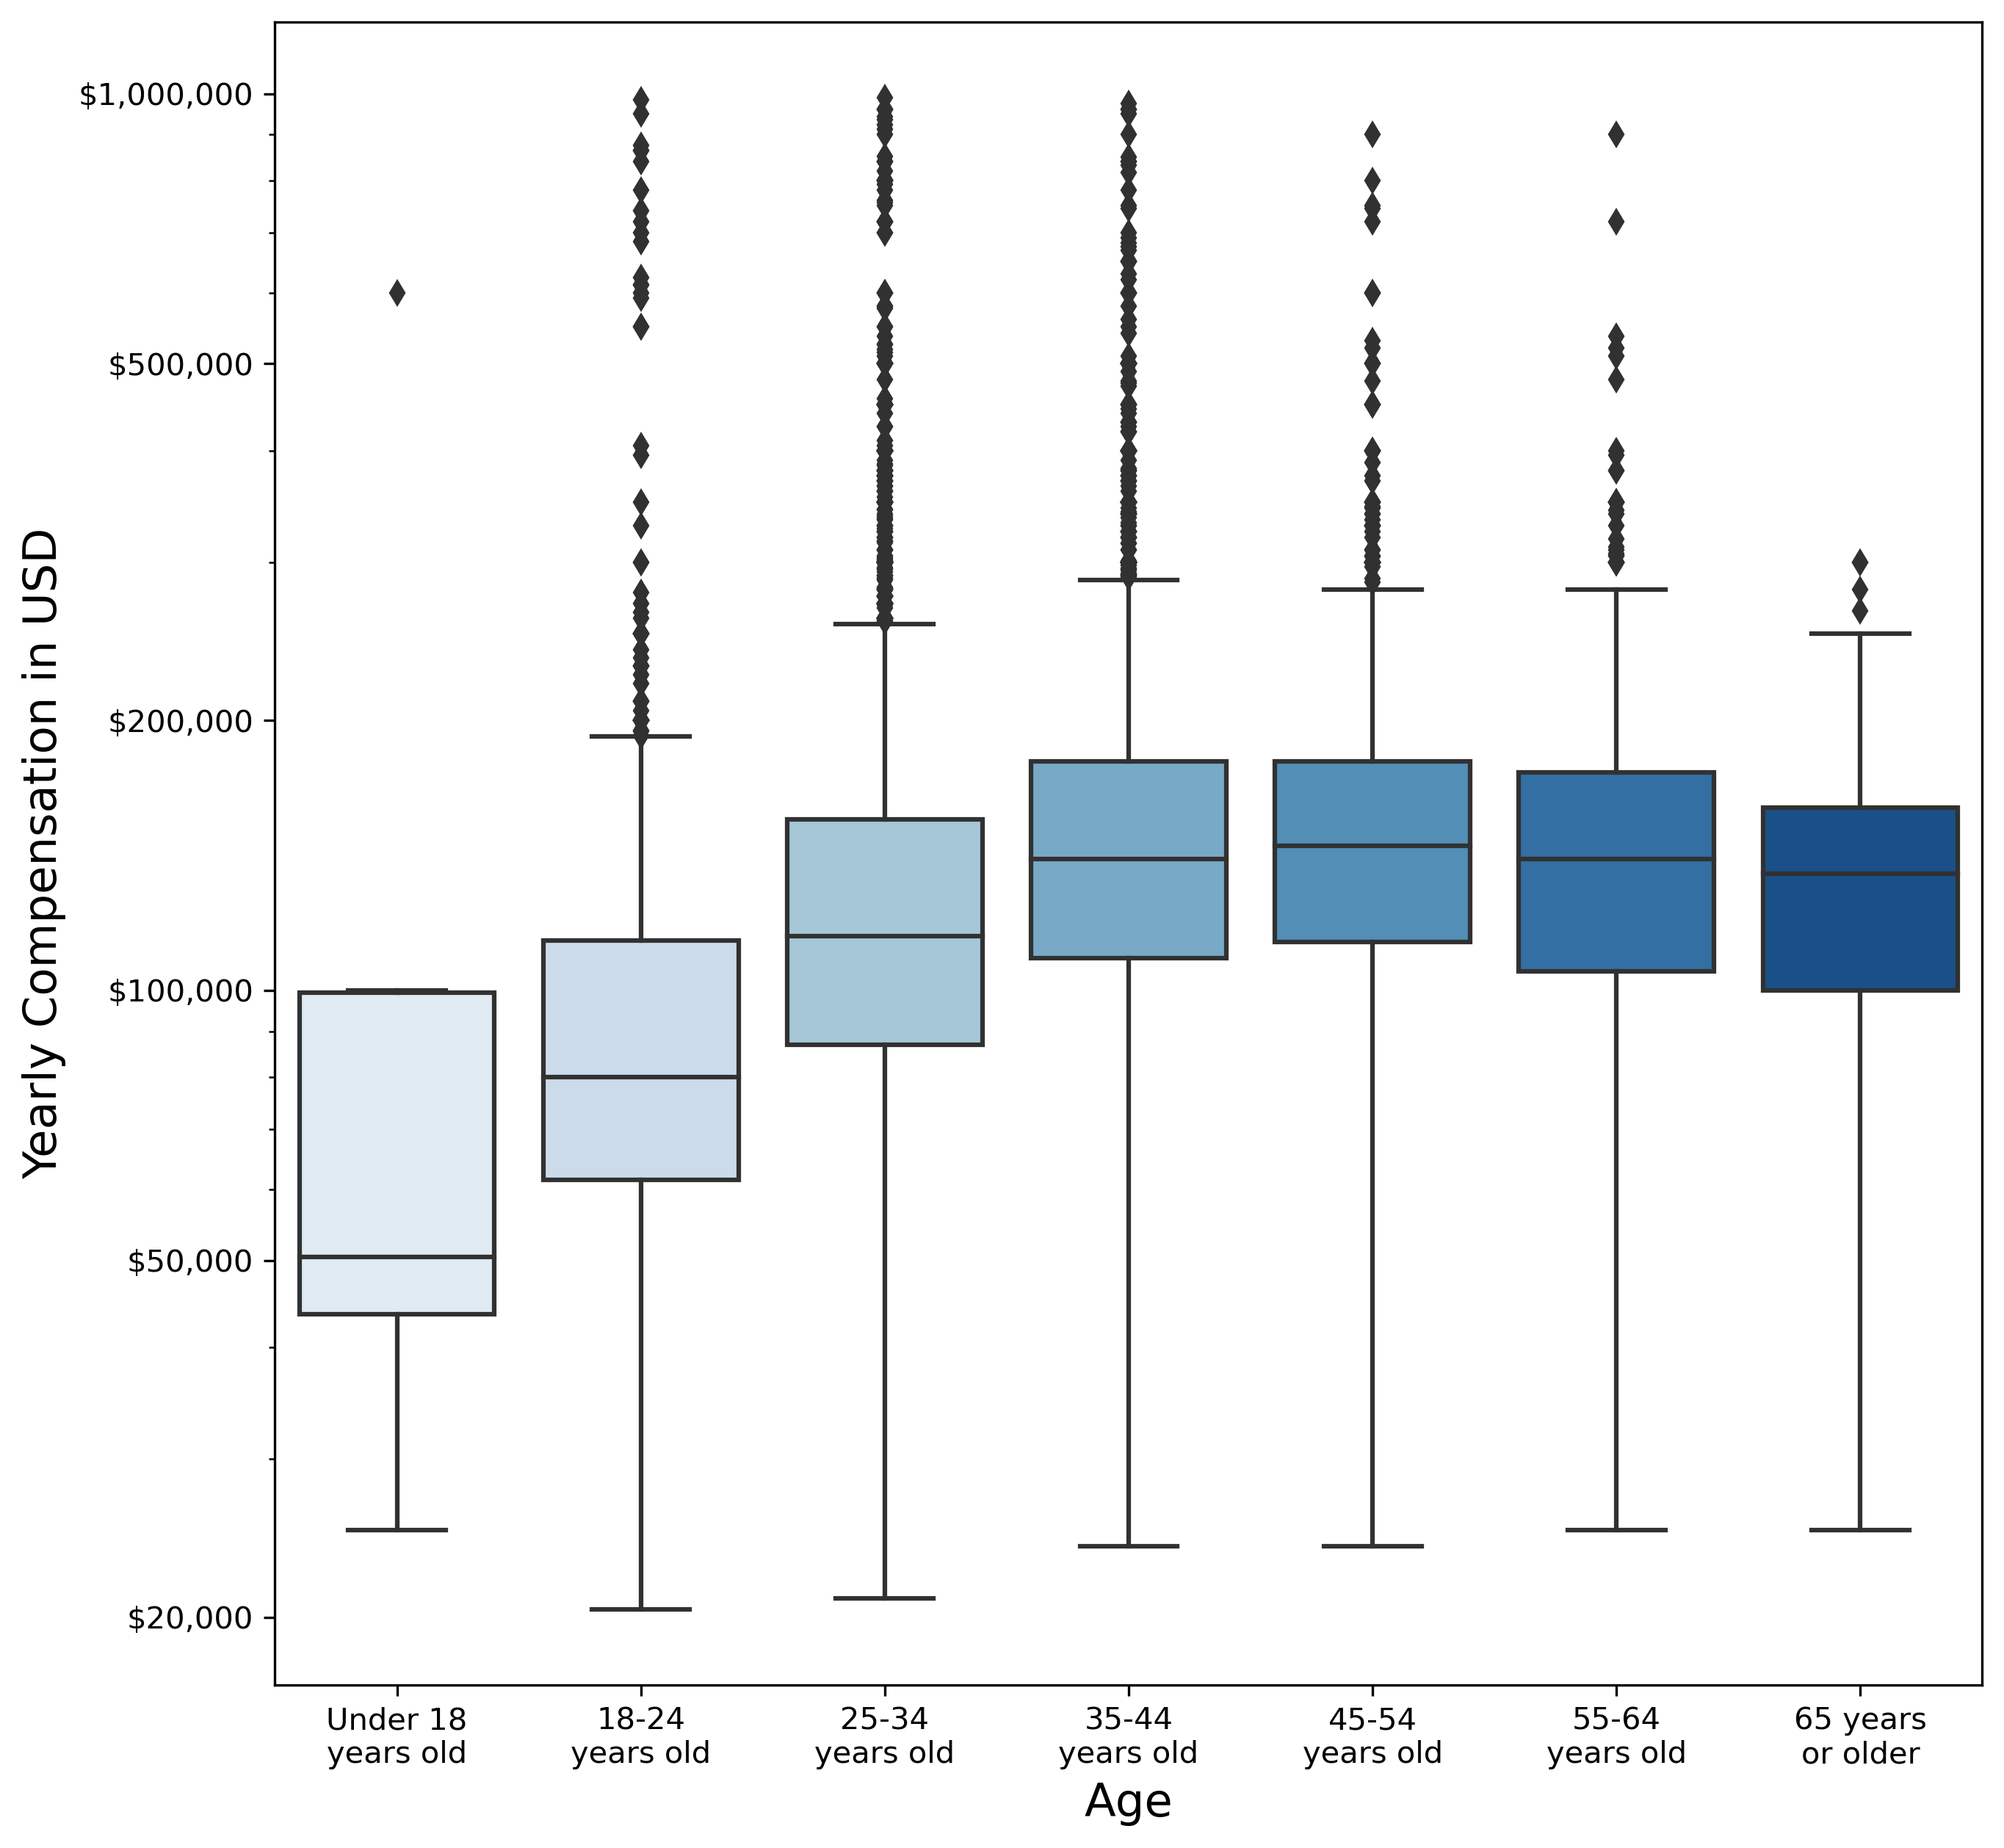

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), dpi=300)
ax = sns.boxplot(x='Age', y='ConvertedCompYearly', data=developers_demo, palette="Blues", 
                 order=['Under 18 years old', '18-24 years old','25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'])
ax.set_yscale("log")

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Yearly Compensation in USD", fontsize=15)
wrap_xlabels(ax, 10, 10)
wrap_ylabels(ax, 10, 10)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_yticks([20000, 50000, 100000, 200000, 500000, 1000000])
plt.savefig('age_box.png', dpi=300, pad_inches=0.1)

fig.autolayout : True

In [28]:
developers_demo[developers_demo.Age == 'Under 18 years old'].ConvertedCompYearly.median()

50400.0

In [29]:
developers_demo[(developers_demo.Age == '35-44 years old') | (developers_demo.Age == '45-54 years old')].ConvertedCompYearly.median()

140000.0

In [30]:
developers_demo[developers_demo.Age == '65 years or older'].ConvertedCompYearly.median()

135000.0

In [31]:
for row in developers_demo.Trans:
    if row not in ['Yes', 'No'] and pd.isna(row) == False:
        developers_demo.Trans = developers_demo.Trans.replace(row, float('nan'))
developers_demo.Trans.value_counts(dropna=False)

No     8956
NaN     309
Yes     149
Name: Trans, dtype: int64

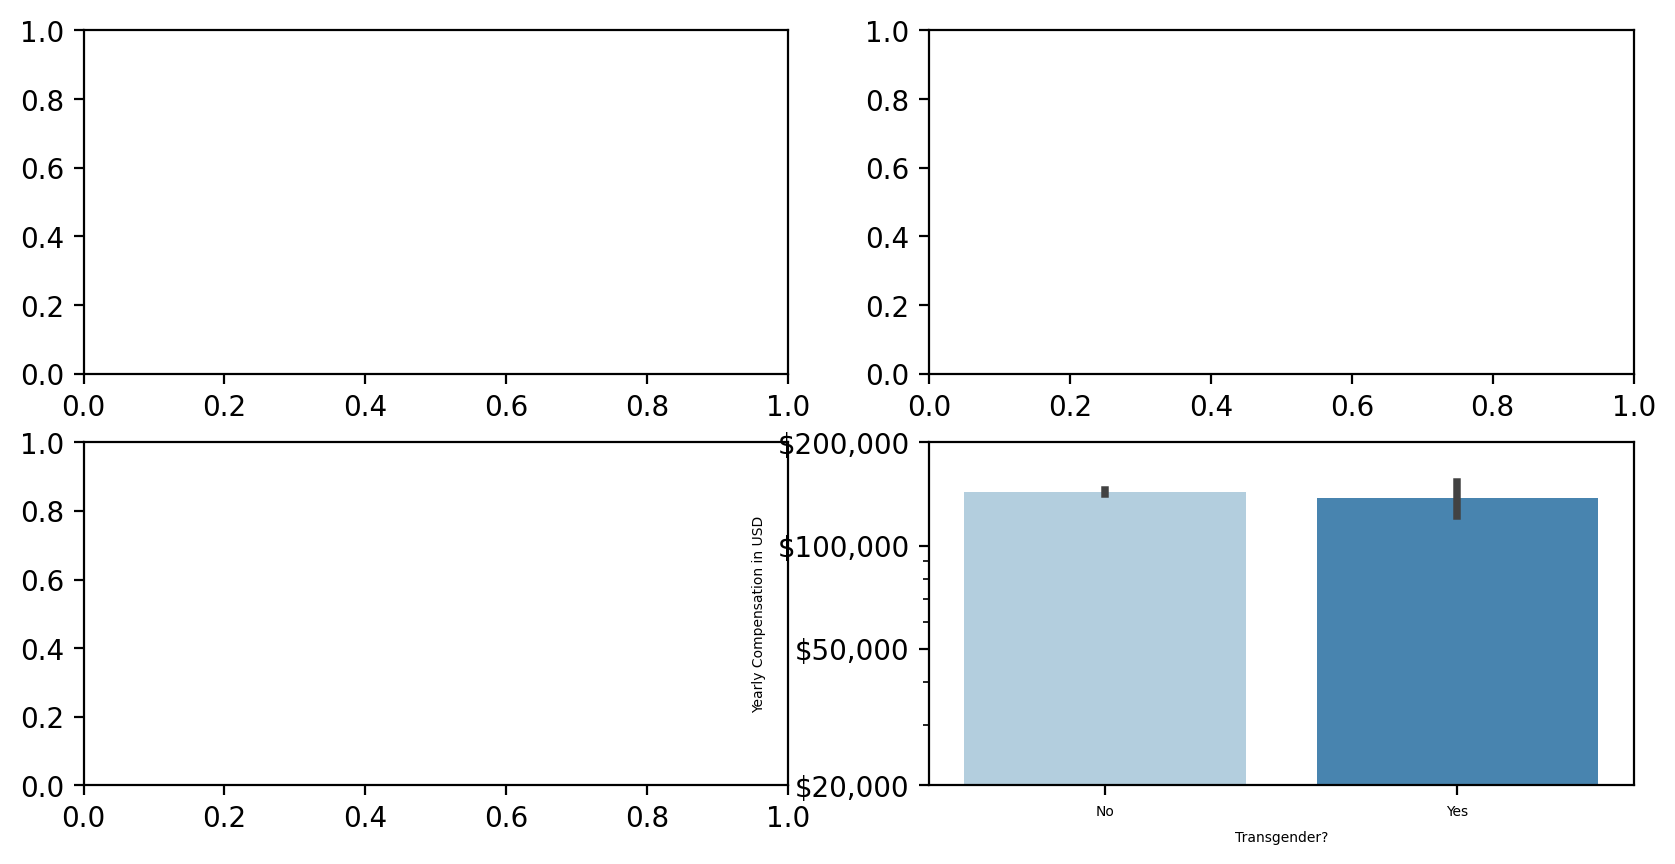

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10,5), dpi=200)
ax = sns.barplot(x='Trans', y='ConvertedCompYearly', data=developers_demo, palette="Blues")
ax.set_yscale("log")

ax.set_xlabel("Transgender?", fontsize=5)
ax.set_ylabel("Yearly Compensation in USD", fontsize=5)
ax.set_ylim((20000, 200000))
wrap_xlabels(ax, 20, 5)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_yticks([20000, 50000, 100000, 200000])
plt.rcParams.update({'font.size': 5})
plt.savefig('trans_box.png', dpi=300, pad_inches=0.1)

fig.autolayout : True

In [33]:
developers_demo.Sexuality.value_counts(dropna=False)

Straight / Heterosexual                                                           7491
NaN                                                                                523
Prefer not to say                                                                  347
Bisexual                                                                           338
Gay or Lesbian                                                                     235
Prefer to self-describe:                                                           104
Queer                                                                               91
Bisexual;Queer                                                                      78
Straight / Heterosexual;Bisexual                                                    65
Gay or Lesbian;Queer                                                                40
Straight / Heterosexual;Prefer to self-describe:                                    22
Straight / Heterosexual;Queer              

In [34]:
sexuality_list = ['Straight / Heterosexual', 'Bisexual', 'Gay or Lesbian', 'Queer']
for row in developers_demo.Sexuality:
    if row not in sexuality_list and pd.isna(row) == False:
        developers_demo.Sexuality = developers_demo.Sexuality.replace(row, 'Queer')
developers_demo.Sexuality.value_counts(dropna=False)

Straight / Heterosexual    7491
Queer                       827
NaN                         523
Bisexual                    338
Gay or Lesbian              235
Name: Sexuality, dtype: int64

In [35]:
developers_demo.Sexuality.value_counts(dropna=False)

Straight / Heterosexual    7491
Queer                       827
NaN                         523
Bisexual                    338
Gay or Lesbian              235
Name: Sexuality, dtype: int64

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_8500/2920987200.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, fontsize=fontsize)


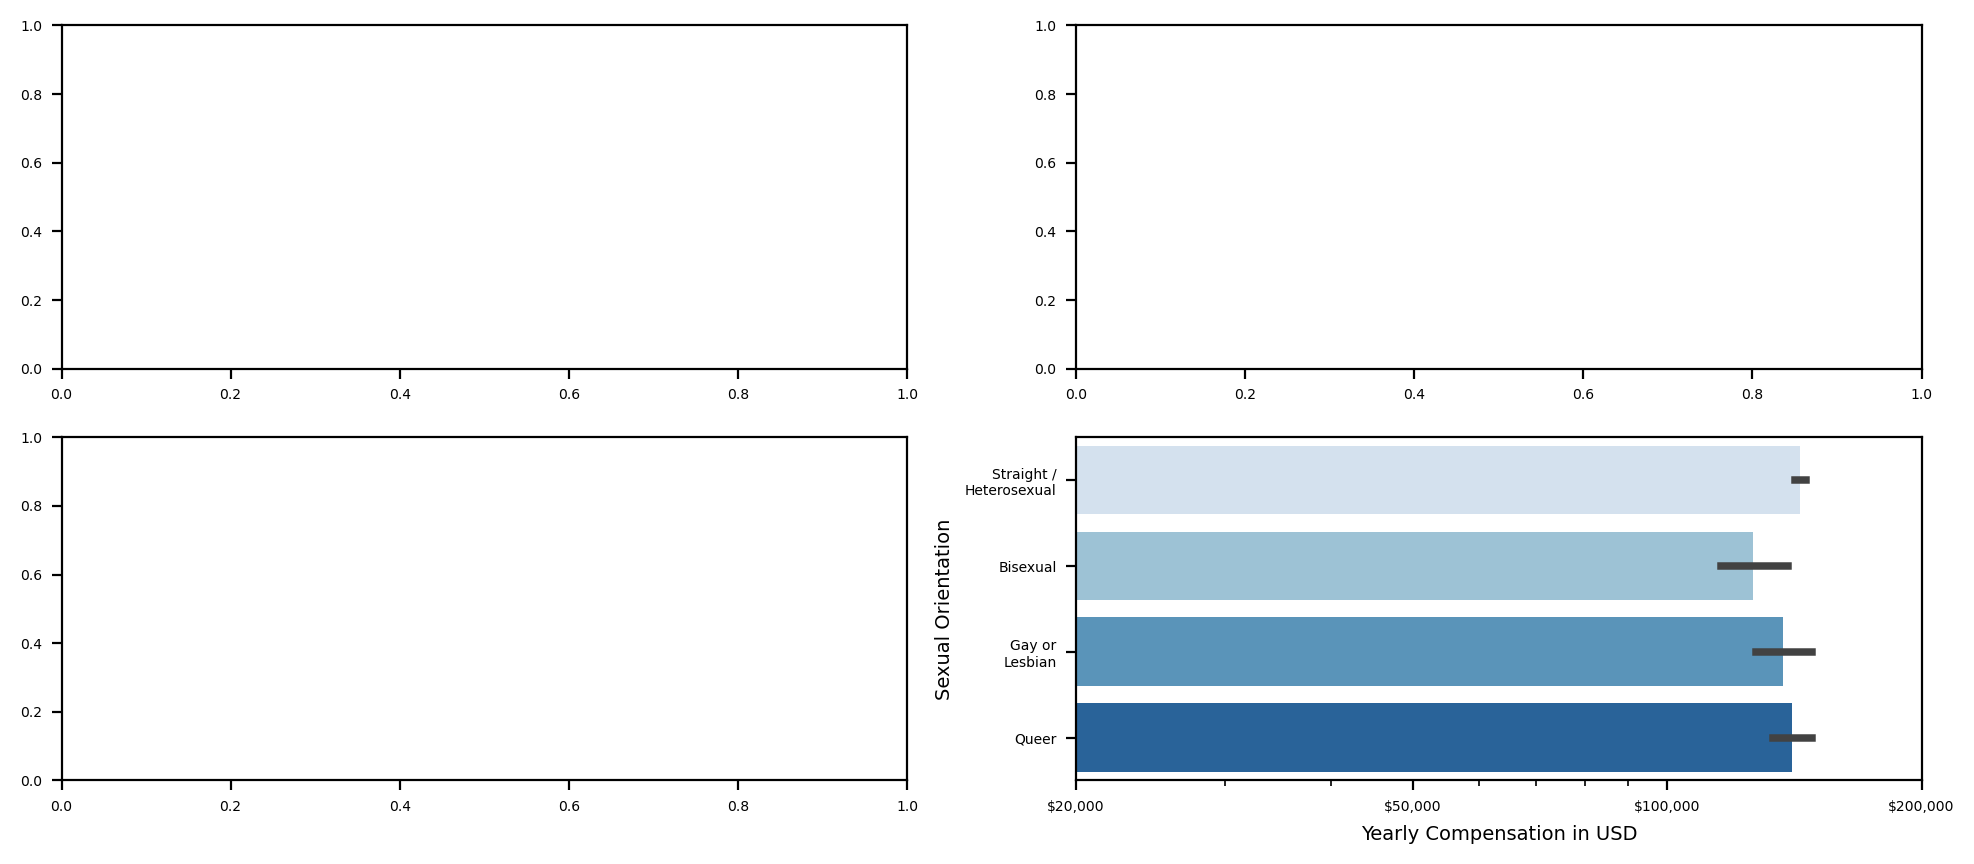

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12,5), dpi=200)
ax = sns.barplot(x='ConvertedCompYearly', y='Sexuality', data=developers_demo, palette="Blues",
                order=['Straight / Heterosexual', 'Bisexual', 'Gay or Lesbian', 'Queer'])
ax.set_xscale("log")

ax.set_ylabel("Sexual Orientation", fontsize=7)
ax.set_xlabel("Yearly Compensation in USD", fontsize=7)
plt.rcParams.update({'font.size': 5})
wrap_xlabels(ax, 10, 5)
wrap_ylabels(ax, 10, 5)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set_xlim((20000, 200000))
ax.set_xticks([20000, 50000, 100000, 200000])
plt.savefig('sexuality_bar.png', dpi=200, pad_inches=0.2)

fig.autolayout : True

In [37]:
developers_demo.Ethnicity.value_counts(dropna=False).head(25)

White or of European descent                                                                                     7016
South Asian                                                                                                       272
Hispanic or Latino/a/x                                                                                            272
Prefer not to say                                                                                                 250
East Asian                                                                                                        217
White or of European descent;Hispanic or Latino/a/x                                                               173
Black or of African descent                                                                                       147
NaN                                                                                                               142
Southeast Asian                                         

In [38]:
ethnicity_list = developers_demo.Ethnicity.str.split(';').explode().reset_index(drop=True).tolist()
for row in developers_demo.Ethnicity:
    if row not in ethnicity_list and pd.isna(row) == False:
        developers_demo.Ethnicity = developers_demo.Ethnicity.replace(row, 'Multiracial')
developers_demo.Ethnicity.value_counts(dropna=False)

White or of European descent                                                        7016
Multiracial                                                                          777
South Asian                                                                          272
Hispanic or Latino/a/x                                                               272
Prefer not to say                                                                    250
East Asian                                                                           217
Black or of African descent                                                          147
NaN                                                                                  142
Southeast Asian                                                                      107
Or, in your own words:                                                                98
Middle Eastern                                                                        57
I don't know         

In [39]:
for row in developers_demo.Ethnicity:
    if row == 'White or of European descent':
        developers_demo.Ethnicity = developers_demo.Ethnicity.replace(row, 'White')
    if row == 'Black or of African descent':
        developers_demo.Ethnicity = developers_demo.Ethnicity.replace(row, 'Black')
    if row == "Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)":
        developers_demo.Ethnicity = developers_demo.Ethnicity.replace(row, 'Indigenous')
    if row in ["Prefer not to say", "I don't know", "Or, in your own words:"]:
        developers_demo.Ethnicity = developers_demo.Ethnicity.replace(row, float('nan'))
developers_demo.Ethnicity.value_counts(dropna=False)

White                     7016
Multiracial                777
NaN                        522
South Asian                272
Hispanic or Latino/a/x     272
East Asian                 217
Black                      147
Southeast Asian            107
Middle Eastern              57
Biracial                    19
Indigenous                   8
Name: Ethnicity, dtype: int64

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_8500/2920987200.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, fontsize=fontsize)


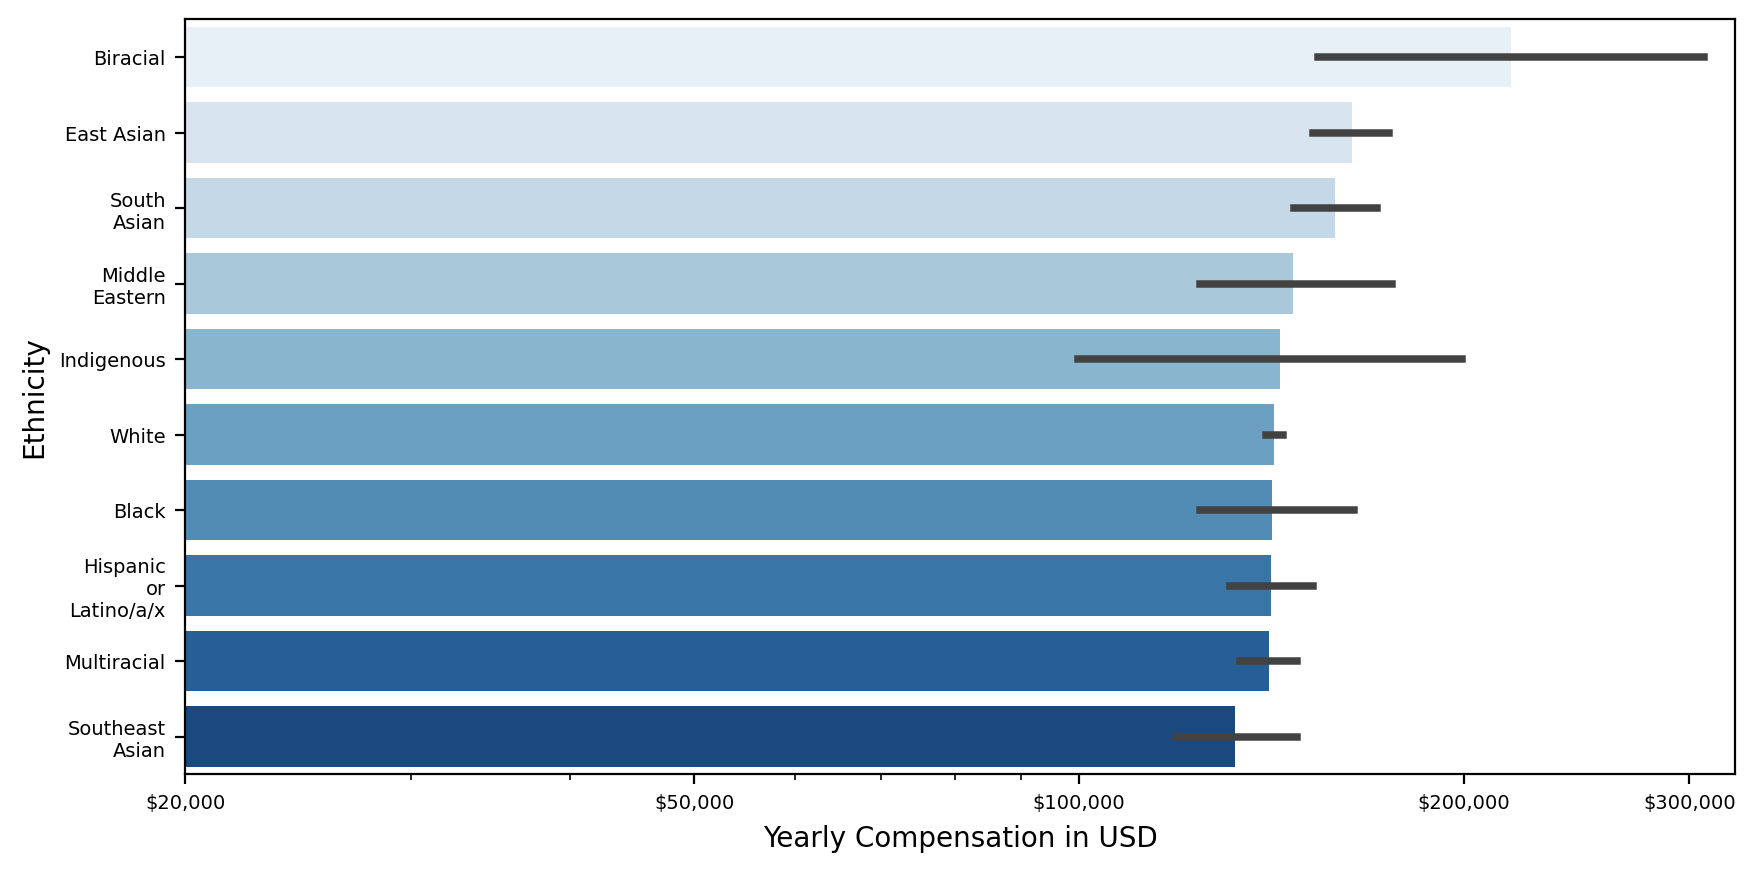

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=200)
ax = sns.barplot(x='ConvertedCompYearly', y='Ethnicity', data=developers_demo, 
                 order=developers_demo.groupby('Ethnicity').mean('ConvertedCompYearly').sort_values(by='ConvertedCompYearly', ascending=False).index,
                palette="Blues")
ax.set_xscale("log")

ax.set_ylabel("Ethnicity", fontsize=10)
ax.set_xlabel("Yearly Compensation in USD", fontsize=10)
plt.rcParams.update({'font.size': 10})
wrap_xlabels(ax, 10, 7)
wrap_ylabels(ax, 10, 7)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set_xticks([20000, 50000, 100000, 200000, 300000])
plt.savefig('ethnicity_bar.png', dpi=200, pad_inches=0.2)

fig.autolayout : True

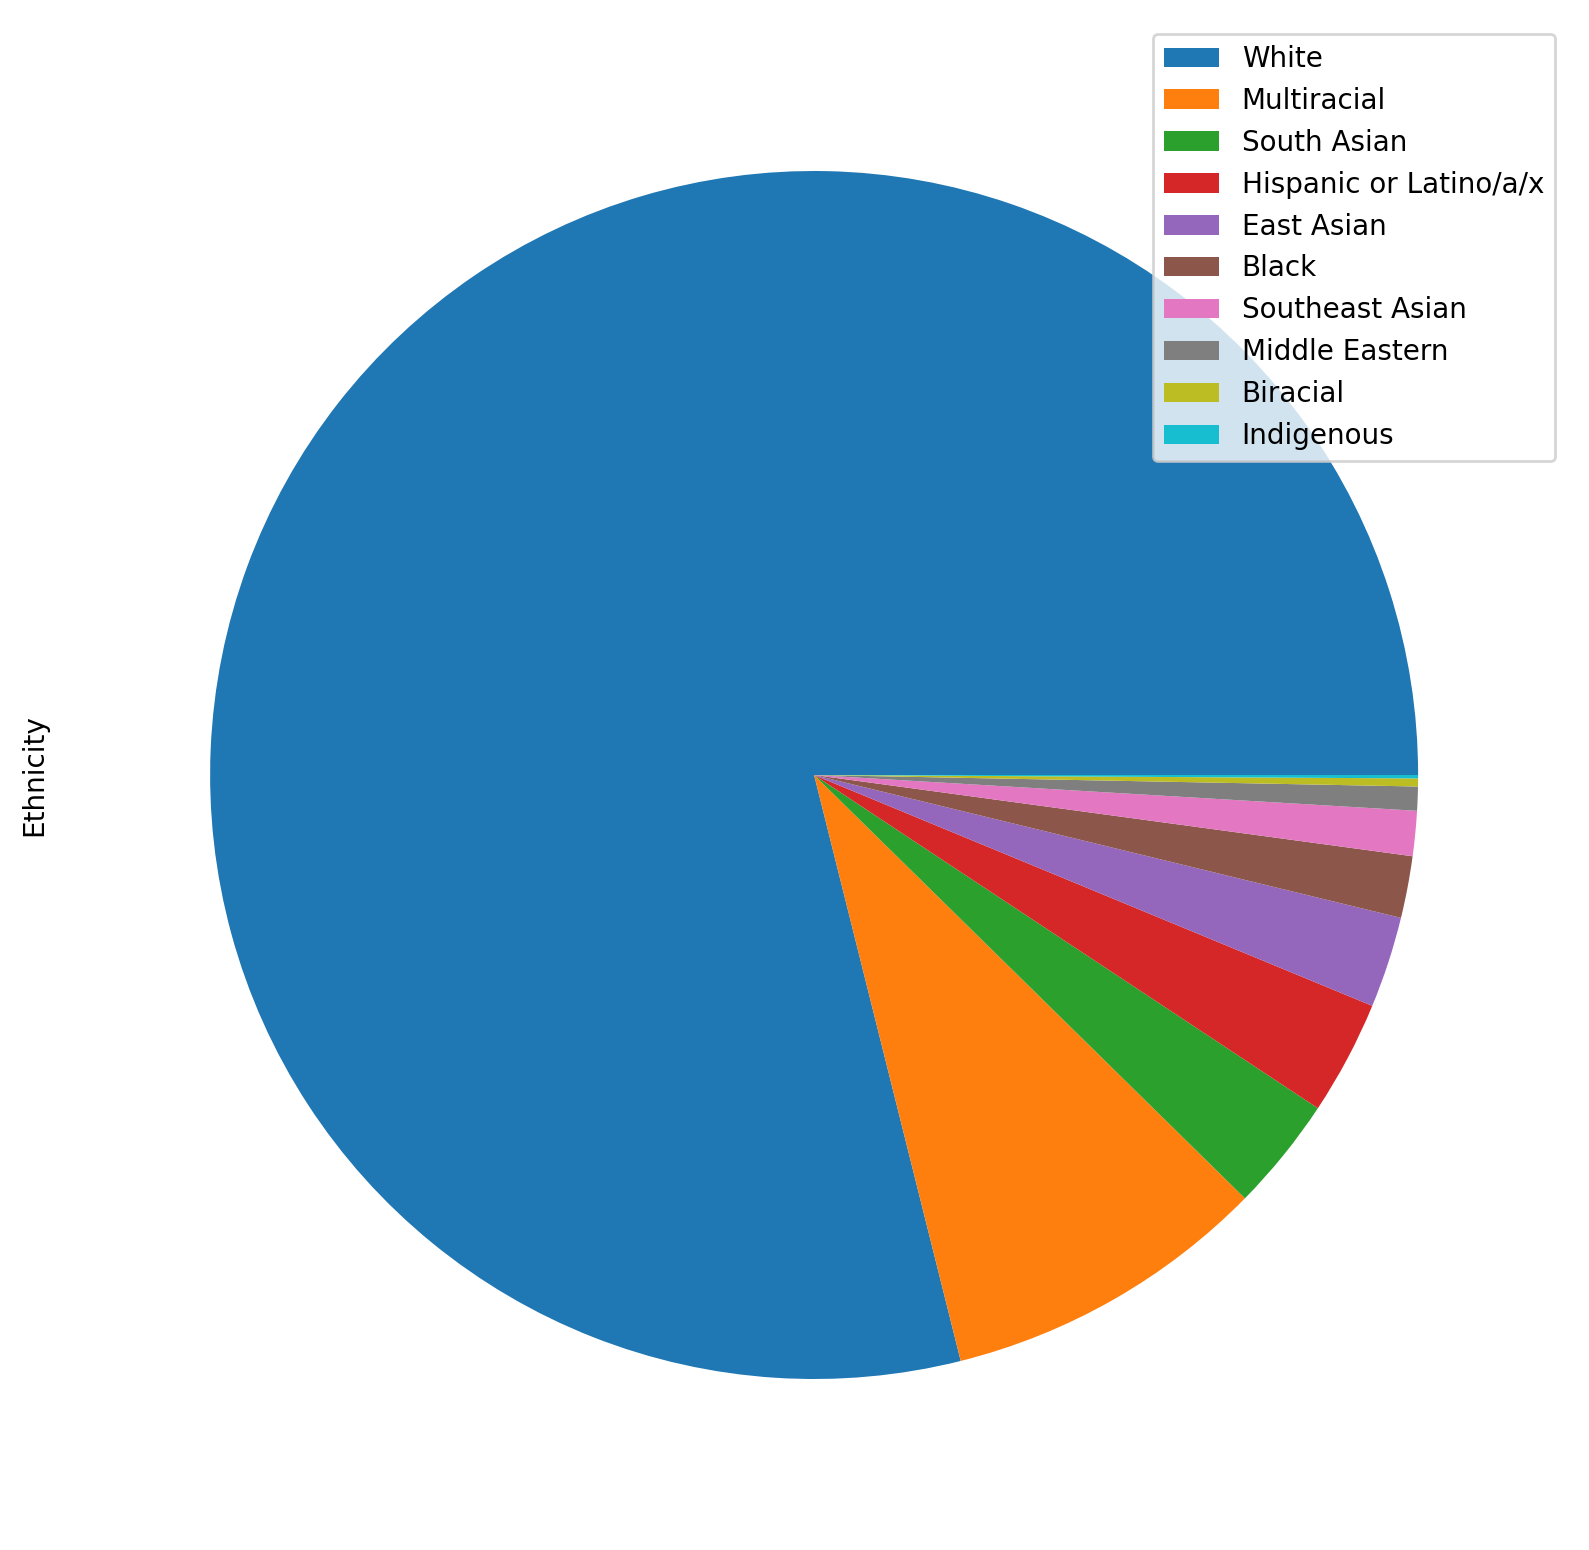

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), dpi=200)
ax = developers_demo.Ethnicity.value_counts().plot(kind='pie', figsize=(10,10), legend=True, labels=None)

plt.savefig('ethnicity_pie.png', dpi=200, pad_inches=0.2)

fig.autolayout : True

In [42]:
mh = list(developers_demo.MentalHealth.str.split(";").explode().reset_index(drop=True))
mh_dict = {x:mh.count(x) for x in set(mh)}
mh_dict

{nan: 327,
 'None of the above': 5710,
 "I have autism / an autism spectrum disorder (e.g. Asperger's)": 405,
 'I have a concentration and/or memory disorder (e.g. ADHD)': 1520,
 'Prefer not to say': 387,
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder)': 1325,
 'I have an anxiety disorder': 1366,
 'Or, in your own words:': 157}

In [43]:
mh_dict.pop('Prefer not to say')
mh_dict.pop('Or, in your own words:')
mh_dict.pop('None of the above')
mh_dict.pop(np.nan)
mh_dict

{"I have autism / an autism spectrum disorder (e.g. Asperger's)": 405,
 'I have a concentration and/or memory disorder (e.g. ADHD)': 1520,
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder)': 1325,
 'I have an anxiety disorder': 1366}

In [44]:
mh_dict_sorted = dict(sorted(mh_dict.items(), key=lambda item: item[1], reverse=True))
mh_dict_sorted

{'I have a concentration and/or memory disorder (e.g. ADHD)': 1520,
 'I have an anxiety disorder': 1366,
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder)': 1325,
 "I have autism / an autism spectrum disorder (e.g. Asperger's)": 405}

In [45]:
mh_keys = list(mh_dict_sorted.keys())
mh_keys

['I have a concentration and/or memory disorder (e.g. ADHD)',
 'I have an anxiety disorder',
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder)',
 "I have autism / an autism spectrum disorder (e.g. Asperger's)"]

In [46]:
mh_values = list(mh_dict_sorted.values())
mh_values

[1520, 1366, 1325, 405]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


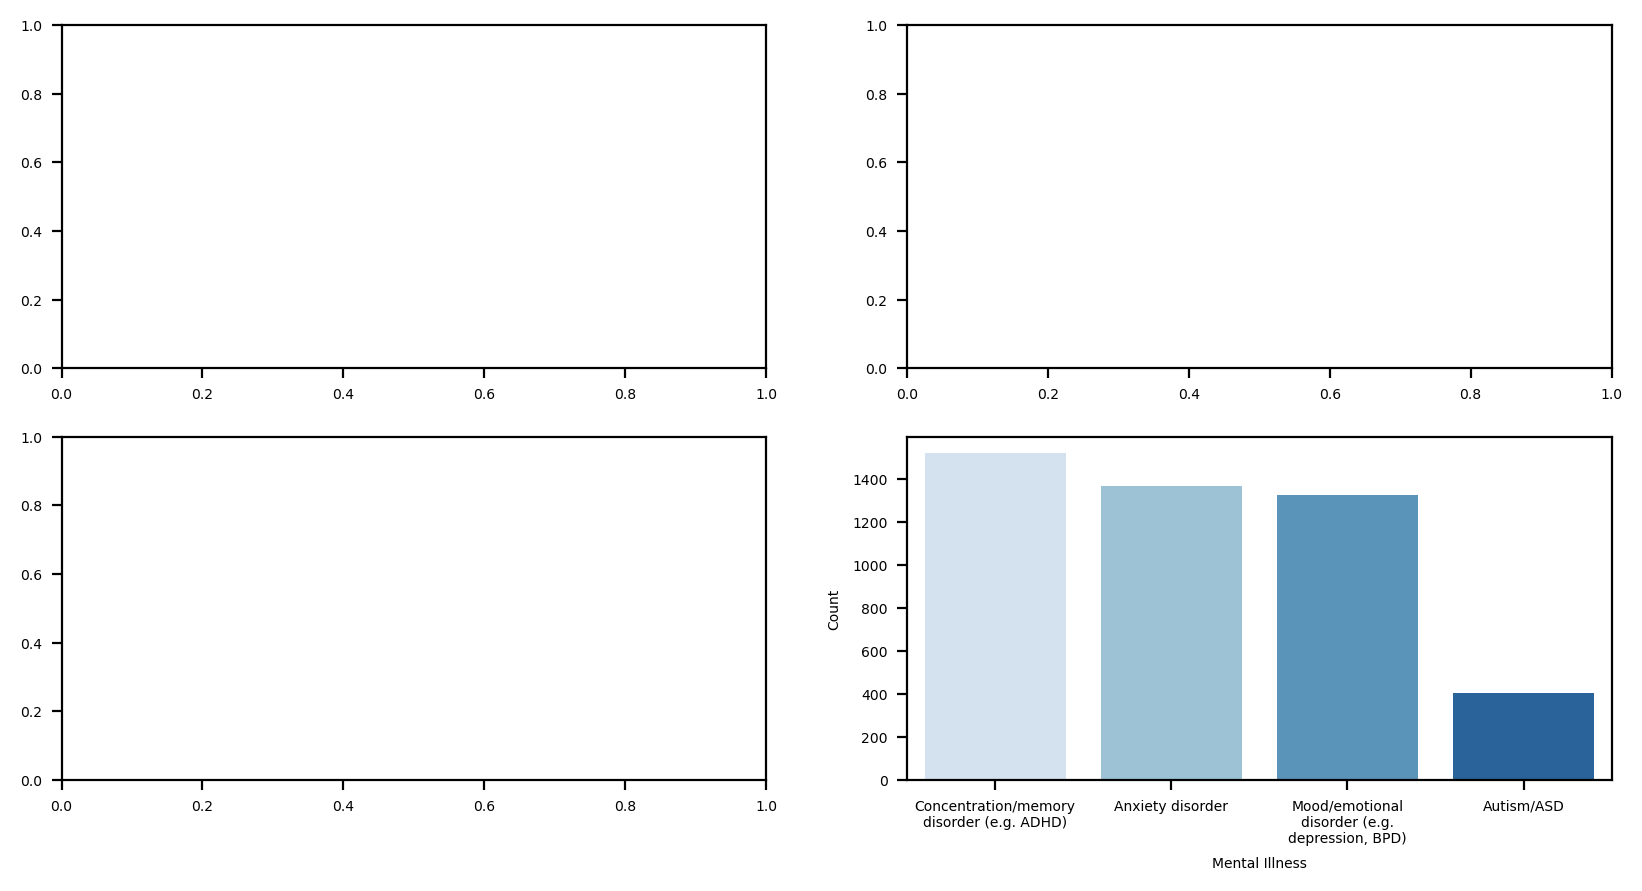

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(10,5), dpi=200)
ax = sns.barplot(["Concentration/memory disorder (e.g. ADHD)", "Anxiety disorder", "Mood/emotional disorder (e.g. depression, BPD)", "Autism/ASD"], mh_values, palette="Blues")

ax.set_xlabel("Mental Illness", fontsize=5)
ax.set_ylabel("Count", fontsize=5)
wrap_xlabels(ax, 20, 5)

plt.rcParams.update({'font.size': 5})
plt.savefig('MH_stem.png', dpi=300, pad_inches=0.1)

fig.autolayout : True

In [48]:
developers_demo.MentalHealth.value_counts()

None of the above                                                                                                                                                                                                                                    5710
I have a concentration and/or memory disorder (e.g. ADHD)                                                                                                                                                                                             717
I have an anxiety disorder                                                                                                                                                                                                                            421
Prefer not to say                                                                                                                                                                                                                                     387


In [49]:
for row in developers_demo.MentalHealth:
    if row == "Prefer not to say":
        developers_demo.MentalHealth = developers_demo.MentalHealth.replace(row, float('nan'))
    if row not in ["None of the above", np.nan]:
        developers_demo.MentalHealth = developers_demo.MentalHealth.replace(row, "Has mental health disorder")
developers_demo.MentalHealth.value_counts()

None of the above             5710
Has mental health disorder    3704
Name: MentalHealth, dtype: int64

In [50]:
for row in developers_demo.MentalHealth:
    if row == "None of the above":
        developers_demo.MentalHealth = developers_demo.MentalHealth.replace(row, "Does not have mental health disorder")
developers_demo.MentalHealth.value_counts()

Does not have mental health disorder    5710
Has mental health disorder              3704
Name: MentalHealth, dtype: int64

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_8500/3896662847.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=fontsize)


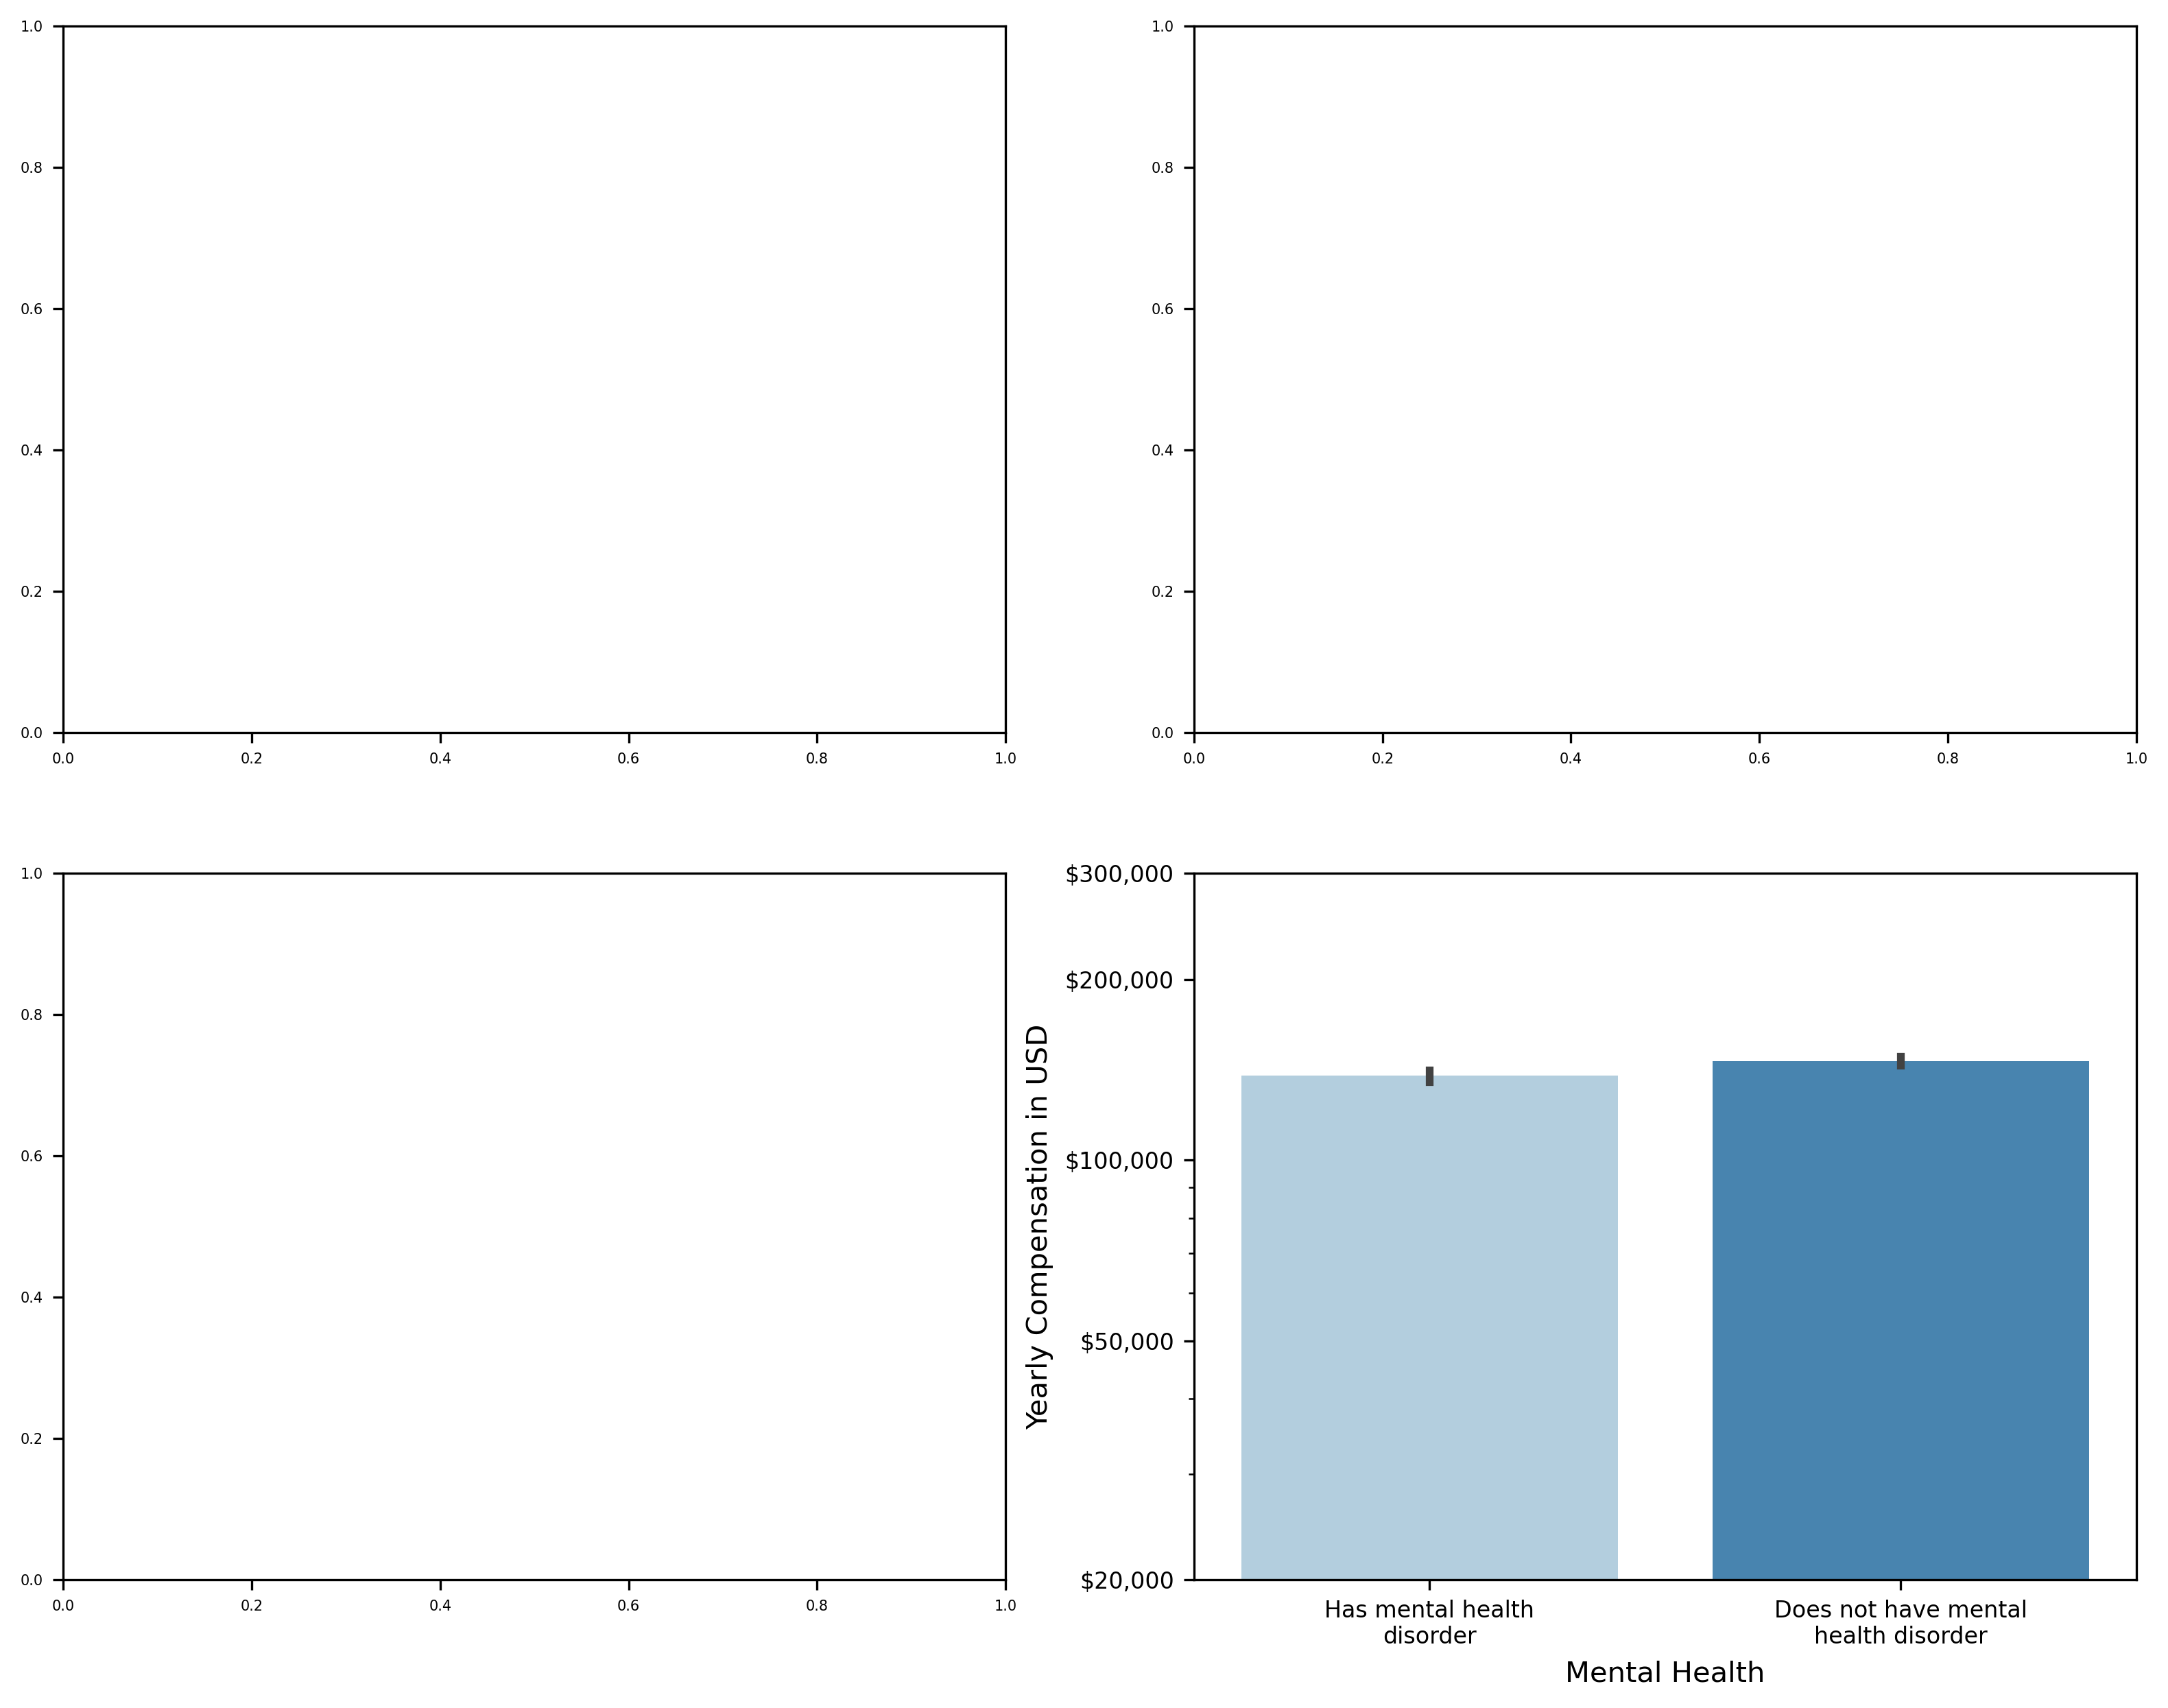

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(13,10), dpi=300)
ax = sns.barplot(x='MentalHealth', y='ConvertedCompYearly', data=developers_demo, palette="Blues")
ax.set_yscale("log")

ax.set_xlabel("Mental Health", fontsize=10)
ax.set_ylabel("Yearly Compensation in USD", fontsize=10)
wrap_xlabels(ax, 20, 8)
wrap_ylabels(ax, 10, 8)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_yticks([20000, 50000, 100000, 200000, 300000])
plt.savefig('mh_box.png', dpi=300, pad_inches=0.1)

fig.autolayout : True

In [51]:
developers_demo.Accessibility.value_counts()

None of the above                                                                                                                                        8655
Prefer not to say                                                                                                                                         131
Or, in your own words:                                                                                                                                     84
I am deaf / hard of hearing                                                                                                                                79
I am blind / have difficulty seeing                                                                                                                        58
I am unable to / find it difficult to walk or stand without assistance                                                                                     23
I am unable to / find it difficult to type          

In [52]:
disab = list(developers_demo.Accessibility.str.split(";").explode().reset_index(drop=True))
disab_dict = {x:disab.count(x) for x in set(disab)}
disab_dict

{nan: 335,
 'I am blind / have difficulty seeing': 71,
 'I am deaf / hard of hearing': 94,
 'I am unable to / find it difficult to type': 33,
 'None of the above': 8655,
 'Prefer not to say': 131,
 'I am unable to / find it difficult to walk or stand without assistance': 29,
 'Or, in your own words:': 99}

In [53]:
disab_dict.pop('Prefer not to say')
disab_dict.pop('Or, in your own words:')
disab_dict.pop('None of the above')
disab_dict.pop(np.nan)
disab_dict

{'I am blind / have difficulty seeing': 71,
 'I am deaf / hard of hearing': 94,
 'I am unable to / find it difficult to type': 33,
 'I am unable to / find it difficult to walk or stand without assistance': 29}

In [54]:
for row in developers_demo.Accessibility:
    if row == "I am deaf / hard of hearing;Or, in your own words:":
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, "I am deaf / hard of hearing")
    if row == "I am unable to / find it difficult to type;Or, in your own words:":
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, "I am unable to / find it difficult to type")
    if row == "I am blind / have difficulty seeing;Or, in your own words:":
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, "I am blind / have difficulty seeing")
    if row == "I am deaf / hard of hearing;Or, in your own words:":
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, "I am deaf / hard of hearing")
    
developers_demo.Accessibility.value_counts(dropna=False)

None of the above                                                                                                                                        8655
NaN                                                                                                                                                       335
Prefer not to say                                                                                                                                         131
I am deaf / hard of hearing                                                                                                                                85
Or, in your own words:                                                                                                                                     84
I am blind / have difficulty seeing                                                                                                                        60
I am unable to / find it difficult to type          

In [55]:
for row in developers_demo.Accessibility:
    if row not in ["None of the above", np.nan, "Prefer not to say", "I am deaf / hard of hearing", "Or, in your own words:", "I am blind / have difficulty seeing", 
                   "I am unable to / find it difficult to type", "I am unable to / find it difficult to walk or stand without assistance"]:
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, "Multiple disabilities")

In [56]:
developers_demo.Accessibility.value_counts()

None of the above                                                         8655
Prefer not to say                                                          131
I am deaf / hard of hearing                                                 85
Or, in your own words:                                                      84
I am blind / have difficulty seeing                                         60
I am unable to / find it difficult to type                                  27
I am unable to / find it difficult to walk or stand without assistance      23
Multiple disabilities                                                       14
Name: Accessibility, dtype: int64

In [57]:
for row in developers_demo.Accessibility:
    if row in ["Prefer not to say", "Or, in your own words:"]:
        developers_demo.Accessibility = developers_demo.Accessibility.replace(row, float('nan'))
developers_demo.Accessibility.value_counts()

None of the above                                                         8655
I am deaf / hard of hearing                                                 85
I am blind / have difficulty seeing                                         60
I am unable to / find it difficult to type                                  27
I am unable to / find it difficult to walk or stand without assistance      23
Multiple disabilities                                                       14
Name: Accessibility, dtype: int64

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_8500/3896662847.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=fontsize)


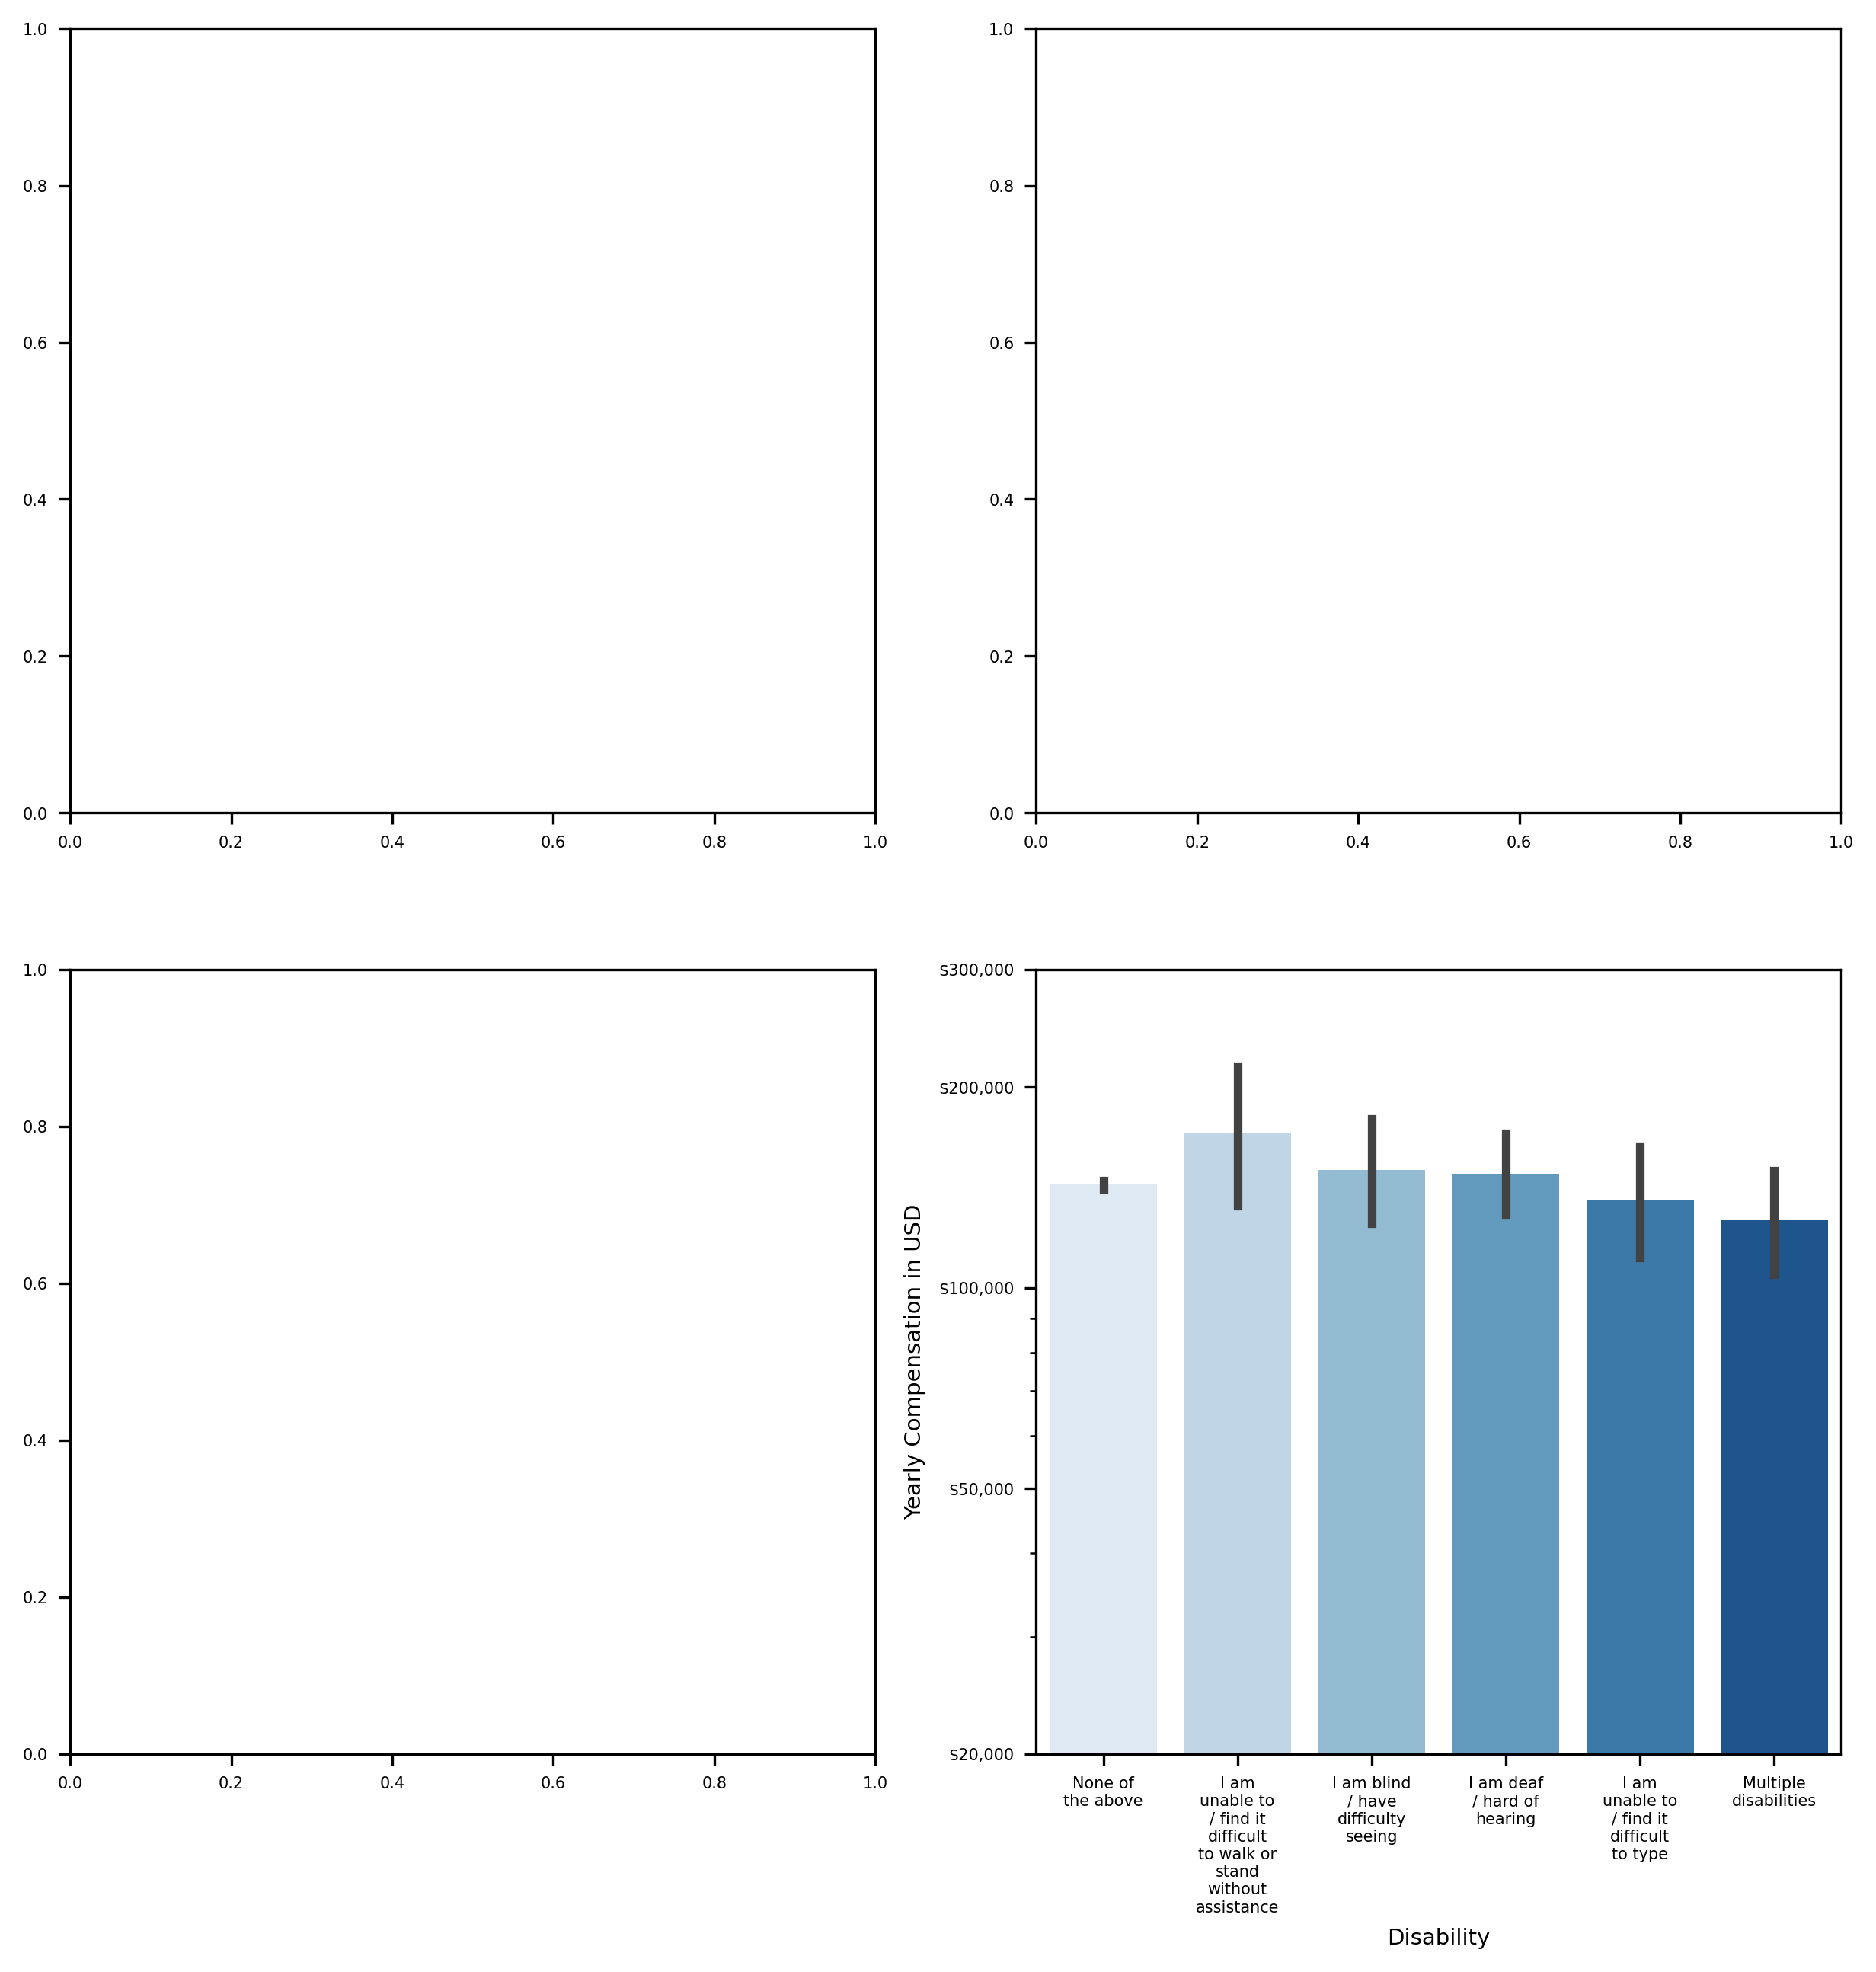

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), dpi=300)
ax = sns.barplot(x='Accessibility', y='ConvertedCompYearly', data=developers_demo, palette="Blues")
ax.set_yscale("log")

ax.set_xlabel("Disability", fontsize=7)
ax.set_ylabel("Yearly Compensation in USD", fontsize=7)
wrap_xlabels(ax, 10, 5)
wrap_ylabels(ax, 10, 5)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_yticks([20000, 50000, 100000, 200000, 300000])
plt.savefig('disab_box.png', dpi=300, pad_inches=0.1)

fig.autolayout : True